# Mandarory Exercise: Parsing
Statement:
* Consider the following sentence: Lazy cats play with mice.
* Expand the grammar of the example related to non-probabilistic chart parsers in order to subsume this new sentence.
* Perform the constituency parsing using a BottomUpChartParser, a BottomUpLeftCornerChartParser and a LeftCornerChartParser.
* For each one of them, provide the resulting tree, the number of edges and the list of explored edges.
* Which parser is the most efficient for parsing the sentence?
* Which edges are filtered out by each parser and why?

In [2]:
import nltk
from nltk import CFG, ChartParser
from nltk import TopDownChartParser, BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser

In [26]:
sentence = 'Lazy cats play with mice'
sentence = sentence.lower().split()

grammar = CFG.fromstring('''
 S -> NP VP | JJ NNS VP
 NP -> NNS | JJ NNS | NP CC NP
 VP -> V PP | V PREP NP 
 PP -> PREP NP
 NNS -> "cats" | "dogs" |"mice" | NNS CC NNS
 JJ -> "big" | "small" | "lazy"
 CC -> "and" | "or" 
 PREP -> "with"
 V -> "play"
''')


Num edges 48


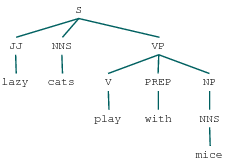

In [44]:
parser = TopDownChartParser(grammar)
parsed = parser.parse(sentence)
print('Num edges', parser.chart_parse(sentence).num_edges())

ts = []
for t in parsed:
    ts.append(t)
ts[0]

In [47]:
parser.chart_parse(sentence).edges()

[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:0] S  -> * NP VP],
 [Edge: [0:0] S  -> * JJ NNS VP],
 [Edge: [0:0] NP -> * NNS],
 [Edge: [0:0] NP -> * JJ NNS],
 [Edge: [0:0] NP -> * NP CC NP],
 [Edge: [0:0] JJ -> * 'lazy'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:1] S  -> JJ * NNS VP],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:1] NNS -> * 'cats'],
 [Edge: [1:1] NNS -> * NNS CC NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [0:2] S  -> JJ NNS * VP],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [2:2] VP -> * V PP],
 [Edge: [2:2] VP -> * V PREP NP],
 [Edge: [2:2] V  -> * 'play'],
 [Edge: [2:3] V  -> 'play' *],
 [Edge: [2:3] VP -> V * PP],
 [Edge: [2:3] VP -> V * PREP NP],
 [Edge: [3:3] PREP -> * 'with'],
 [Edge: [3:4] PREP -> 'with' *],
 [Edge: [2:4] VP -> V PREP * NP],
 [Edge: [4:4] NP -> * NNS],
 [Edge: [4:4] NP -> * 

Num edges 54


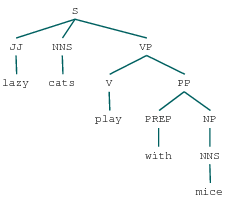

In [40]:
parser_BottomUP = BottomUpChartParser(grammar)
parsed_BottomUP = parser_BottomUP.parse(sentence)
print('Num edges', parser_BottomUP.chart_parse(sentence).num_edges())
ts_b = []
for t in parsed_BottomUP:
    ts_b.append(t)
ts_b[0]

In [46]:
parser_BottomUP.chart_parse(sentence).edges()


[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:0] JJ -> * 'lazy'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:0] S  -> * JJ NNS VP],
 [Edge: [0:0] NP -> * JJ NNS],
 [Edge: [0:1] S  -> JJ * NNS VP],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:1] NNS -> * 'cats'],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:1] NP -> * NNS],
 [Edge: [1:1] NNS -> * NNS CC NNS],
 [Edge: [0:2] S  -> JJ NNS * VP],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [1:1] S  -> * NP VP],
 [Edge: [1:1] NP -> * NP CC NP],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [0:0] S  -> * NP VP],
 [Edge: [0:0] NP -> * NP CC NP],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [2:2] V  -> * 'play'],
 [Edge: [2:3] V  -> 'play' *],
 [Edge: [2:2] VP -> * V PP],
 [Edge: [2:2] VP -> * V PREP NP],
 [Edge: [2:3] VP -> V * PP],
 [Edge: [2:3] VP -> V * PREP N

Num edges 34


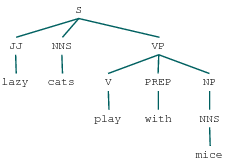

In [41]:
parser_BottomUP_Left = BottomUpLeftCornerChartParser(grammar)
parsed_BottomUP_Left = parser_BottomUP_Left.parse(sentence)
print('Num edges', parser_BottomUP_Left.chart_parse(sentence).num_edges())
ts_b_l = []
for t in parsed_BottomUP_Left:
    ts_b_l.append(t)
ts_b_l[0]

In [48]:
parser_BottomUP_Left.chart_parse(sentence).edges()

[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:1] S  -> JJ * NNS VP],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [0:2] S  -> JJ NNS * VP],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [2:3] V  -> 'play' *],
 [Edge: [2:3] VP -> V * PP],
 [Edge: [2:3] VP -> V * PREP NP],
 [Edge: [3:4] PREP -> 'with' *],
 [Edge: [3:4] PP -> PREP * NP],
 [Edge: [2:4] VP -> V PREP * NP],
 [Edge: [4:5] NNS -> 'mice' *],
 [Edge: [4:5] NP -> NNS *],
 [Edge: [4:5] NNS -> NNS * CC NNS],
 [Edge: [4:5] S  -> NP * VP],
 [Edge: [4:5] NP -> NP * CC NP],
 [Edge: [3:5] PP -> PREP NP *],
 [Edge: [2:5] VP -> V PREP NP *],
 [Edge: [0:5] S  -> JJ NNS VP *],
 [Edge: [0:5] S  -> NP VP *],
 [Edge: [1:5] S  -> 

Num edges 28


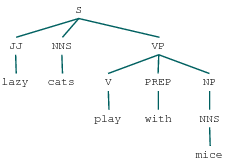

In [42]:
parser_Left = LeftCornerChartParser(grammar)
parsed_Left = parser_Left.parse(sentence)
print('Num edges', parser_Left.chart_parse(sentence).num_edges())
ts_l = []
for t in parsed_Left:
    ts_l.append(t)
ts_l[0]

In [49]:
parser_Left.chart_parse(sentence).edges()

[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:1] S  -> JJ * NNS VP],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [0:2] S  -> JJ NNS * VP],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [2:3] V  -> 'play' *],
 [Edge: [2:3] VP -> V * PP],
 [Edge: [2:3] VP -> V * PREP NP],
 [Edge: [3:4] PREP -> 'with' *],
 [Edge: [3:4] PP -> PREP * NP],
 [Edge: [2:4] VP -> V PREP * NP],
 [Edge: [4:5] NNS -> 'mice' *],
 [Edge: [4:5] NP -> NNS *],
 [Edge: [3:5] PP -> PREP NP *],
 [Edge: [2:5] VP -> V PREP NP *],
 [Edge: [0:5] S  -> JJ NNS VP *],
 [Edge: [0:5] S  -> NP VP *],
 [Edge: [1:5] S  -> NP VP *],
 [Edge: [2:5] VP -> V PP *]]